In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import seaborn as sns
from sklearn_som.som import SOM
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('full_data.csv', engine= 'python')

for c in df.columns[1:]:
    if c == 'TissueTypePrediction':
        break
    if not is_numeric_dtype(df[c]):
        df[c] = df[c].apply(lambda x: float(x.split()[0].replace(',','.')))

In [21]:
PATIENT_NUM = 3
Som_M = 6
Som_N = 6

<AxesSubplot:>

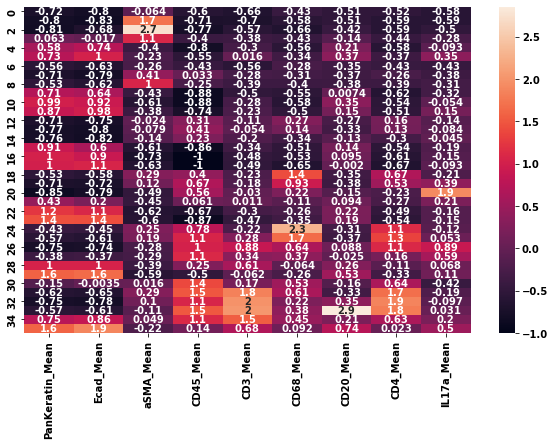

In [22]:
# df = df[df['Patient'] == PATIENT_NUM]
dfn = df._get_numeric_data()
normalized_np = StandardScaler().fit_transform(dfn)
normalized_df = pd.DataFrame(normalized_np, columns=dfn.columns)

typelist = df[df['Patient'] == PATIENT_NUM]['Status.simple'].unique()
maskP = df['Patient'] == PATIENT_NUM
mask = df['Status.simple'] == typelist[0]
df1 = normalized_df.copy()

df1 = normalized_df

col = ["ROInr","Cell_Area","Nucl_Area","X80ArAr_Mean","sSMA113_Mean","aSMA_Mean","X124Xe_Mean","X127I_Mean","X129Xe_Mean","X132Xe_Mean","RORgt_Mean","Ecad_Mean","CD20_Mean","GATA3_Mean","GATA3_Nucl_Mean","Tbet_Mean","Tbet_Nucl_Mean","CD16_Mean","BetaCatenin_Mean","PanKeratin_Mean","CTLA4_Mean","PDL1_Mean","IFNg_Mean","CD45RO_Mean","AKT_Mean","HLA_DR-DP-DQ_Mean","FOXP3_Mean","FOXP3_Nucl_Mean","CD4_Mean","CD103_Mean","pSTAT3_Mean","CD68_Mean","IL10_Mean","CD45_Mean","CD8a_Mean","ICOS_Mean","pS6_Mean","PD1_Mean","NFkB_Mean","NFkB_Nucl_Mean","IL17a_Mean","Ki67_Mean","Ki67_Nucl_Mean","GranzymeB_Mean","CD3_Mean","pERK_Mean","Cleaved Caspase 3_Mean","ERK_Mean","TCRgd_Mean","pAKT_Mean","H3_Mean","H3_Nucl_Mean","Ir193_Mean","Ir193_Nucl_Mean"]
df2 = df1[col]
som = SOM(m=Som_M, n=Som_N, dim=54)
som.fit(np.array(df2),epochs=1000)
df2['predictions'] = som.predict(np.array(df2))
df3 = df2.drop('predictions', axis=1)[col].iloc[0:0]
for i in range(Som_M*Som_N):
    mask = df2['predictions'] == i
    myList = []
    for column in df2.drop('predictions', axis=1)[mask][col]:
        myList.append(df2[mask][column].mean())
    df3.loc[len(df3)] = myList
plotMe = df3[["PanKeratin_Mean", "Ecad_Mean","aSMA_Mean","CD45_Mean", "CD3_Mean","CD68_Mean","CD20_Mean","CD4_Mean", "IL17a_Mean"]]
sns.heatmap(plotMe, annot=True)

<AxesSubplot:>

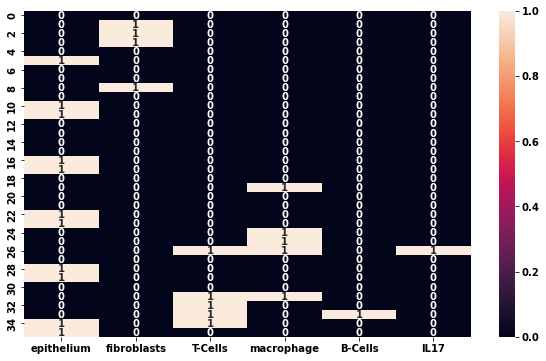

In [23]:
for col in df3[["PanKeratin_Mean", "Ecad_Mean","aSMA_Mean","CD45_Mean", "CD3_Mean","CD68_Mean","CD20_Mean","CD4_Mean", "IL17a_Mean"]]:
    string = col
    string += "-"
    count = 0
    l = []
    for x in df3[col].tolist():
        if x - df3[col].mean() > df3[col].std()*0.75:
            string += str(count)
            string += "-"
            l.append(True)
        else:
            l.append(False)
        count = count + 1
    col += '_'    
    df3[col] = l

epithelium_mask = (df3['PanKeratin_Mean_'] == True) & (df3['Ecad_Mean_'] == True)
fibroblast_mask = df3['aSMA_Mean_'] == True
tcells_mask = (df3['CD45_Mean_'] == True) & (df3['CD3_Mean_'] == True)
macrophage_mask = (df3['CD45_Mean_'] == True) & (df3['CD68_Mean_'] == True)
bcells_mask = (df3['CD45_Mean_'] == True) & (df3['CD20_Mean_'] == True)
il17_mask1 = (df3['CD4_Mean_'] == True) & (df3['IL17a_Mean_'] == True)
il17_mask = tcells_mask&il17_mask1
labels = ['epithelium', 'fibroblasts', 'T-Cells', 'macrophage', 'B-Cells', 'IL17']
masks = [epithelium_mask,fibroblast_mask,tcells_mask,macrophage_mask,bcells_mask,il17_mask]
for mask, label in zip(masks,labels):
    df3[label] = 0
    df3.loc[mask, label] = 1

plotlabel = df3[['epithelium', 'fibroblasts', 'T-Cells', 'macrophage', 'B-Cells', 'IL17']]
sns.heatmap(plotlabel, annot=True)

In [24]:
col = ["ROInr","Cell_Area","Nucl_Area","X80ArAr_Mean","sSMA113_Mean","aSMA_Mean","X124Xe_Mean","X127I_Mean","X129Xe_Mean","X132Xe_Mean","RORgt_Mean","Ecad_Mean","CD20_Mean","GATA3_Mean","GATA3_Nucl_Mean","Tbet_Mean","Tbet_Nucl_Mean","CD16_Mean","BetaCatenin_Mean","PanKeratin_Mean","CTLA4_Mean","PDL1_Mean","IFNg_Mean","CD45RO_Mean","AKT_Mean","HLA_DR-DP-DQ_Mean","FOXP3_Mean","FOXP3_Nucl_Mean","CD4_Mean","CD103_Mean","pSTAT3_Mean","CD68_Mean","IL10_Mean","CD45_Mean","CD8a_Mean","ICOS_Mean","pS6_Mean","PD1_Mean","NFkB_Mean","NFkB_Nucl_Mean","IL17a_Mean","Ki67_Mean","Ki67_Nucl_Mean","GranzymeB_Mean","CD3_Mean","pERK_Mean","Cleaved Caspase 3_Mean","ERK_Mean","TCRgd_Mean","pAKT_Mean","H3_Mean","H3_Nucl_Mean","Ir193_Mean","Ir193_Nucl_Mean"]
celltype = [[] for i in range(len(plotlabel.columns))]
for i in range(len(plotlabel.columns)):
    tr = plotlabel[plotlabel.columns[i]] == 1
    index = plotlabel[tr].index
    celltype[i].extend(index)

for i in range(len(typelist)):
    print("------------------------------------------------")
    print(typelist[i])
    print("------------------------------------------------")
    dfmask = normalized_df[df['Status.simple'] == typelist[i]]
    # dfmask = normalized_df[typelist_mask]
    dfmask['predictions'] = som.predict(np.array(dfmask[col]))
    total = 0
    for i in range(len(celltype)):
        ct = celltype[i]
        # print(ct)
        for y in range(len(ct)):
            mask = dfmask['predictions'] == ct[y]
            total += len(dfmask[mask])

    tot = []
    for i in range(len(celltype)):
        ct = celltype[i]
        # print(ct)
        type = 0
        for y in range(len(ct)):
            mask = dfmask['predictions'] == ct[y]
            type += len(dfmask[mask])
        print(f"{labels[i]} : {type/total*100} %")
        tot.append(type)
    # make histogram
    # plt.bar(labels, tot)


------------------------------------------------
Uninflamed
------------------------------------------------
epithelium : 48.872933083459394 %
fibroblasts : 19.32308248097722 %
T-Cells : 14.62439883492515 %
macrophage : 13.578992526360947 %
B-Cells : 3.517803517803518 %
IL17 : 0.082789556473767 %
------------------------------------------------
Inflamed
------------------------------------------------
epithelium : 27.51360951872121 %
fibroblasts : 10.41254530489654 %
T-Cells : 23.42281200814405 %
macrophage : 23.639409123070482 %
B-Cells : 3.8236610688345634 %
IL17 : 11.187962976333155 %
------------------------------------------------
Dysplastic
------------------------------------------------
epithelium : 55.10491436967202 %
fibroblasts : 13.423835687720963 %
T-Cells : 12.751955187560263 %
macrophage : 14.874730252988261 %
B-Cells : 2.5635531612054057 %
IL17 : 1.2810113408530892 %


In [25]:

dfl = []
difcelltype = set()
for i in range(len(typelist)):
    dfmask = normalized_df[df['ImageNumber'] == (df['ImageNumber'][maskP][df[maskP]['Status.simple'] == typelist[i]].value_counts().index[0])]
    dfmask['predictions'] = som.predict(np.array(dfmask[col]))
    dfmask['CellType'] = 'Unlabelled'
    for j in range(len(celltype)):
        ct = celltype[j]
        for y in range(len(ct)):
            mask = dfmask['predictions'] == ct[y]
            overide = dfmask['CellType'][mask] != 'Unlabelled'
            if sum(overide) > 0:  
                df_np = dfmask[mask]["CellType"].values
                dfmask["CellType"][mask] = [str(labels[j] + ", "+ z) for z in df_np]
            else:
                dfmask["CellType"][mask] = labels[j]
    dfmask["Status"] = typelist[i]
    dfl.append(dfmask)
    difcelltype = difcelltype.union(set(dfmask["CellType"].unique()))
    

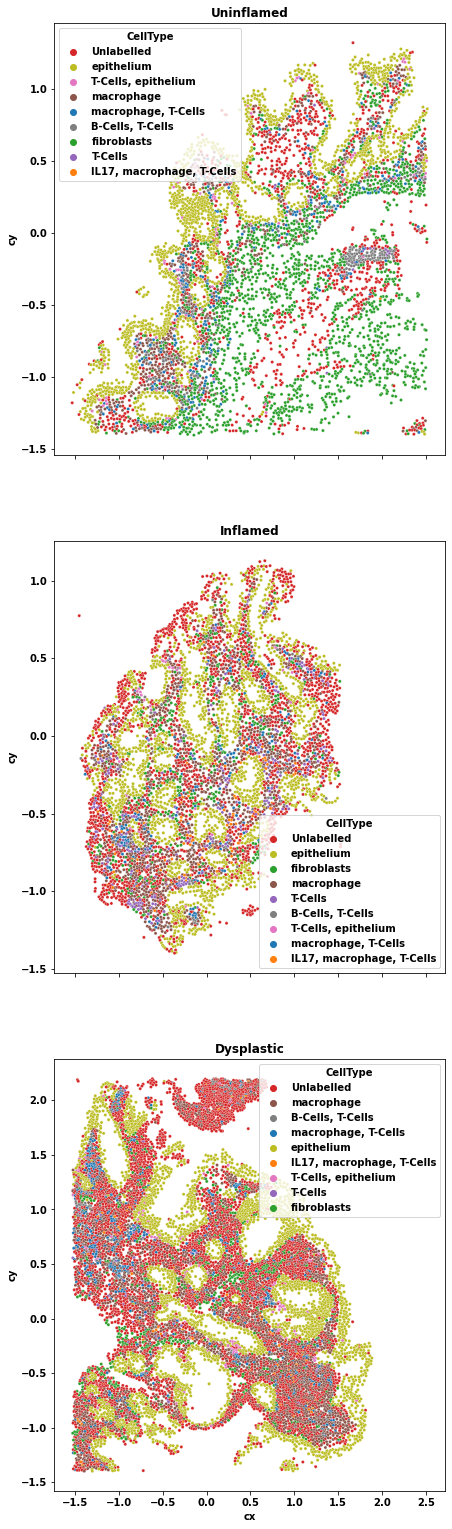

In [26]:
pa = sns.color_palette("tab10", len(difcelltype))
palette_dict = dict(zip(difcelltype, pa))

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(7,9*3), sharex=True)
for i in range(len(dfl)):
    sns.scatterplot(x='cx', y='cy', data=dfl[i], hue="CellType", s = 10, ax=ax[i], palette=palette_dict)
    ax[i].set_title(f"{typelist[i]}")
    fig.show()